In [28]:
import pandas as pd
import numpy as np
import os

In [29]:
data_dir = '../data'
img_ext = ['jpg', 'png', 'jpeg']

segmentation = ['face', 'body', 'clothing', 'environment']

In [30]:
image_list = []
for image in os.listdir(f'{data_dir}/images_ps'):
    if image.split('.')[1] in img_ext:
        image_list.append(image)

len(image_list)

1126

In [31]:
# Initialize dataframe
df = pd.read_csv(f'{data_dir}/annotation_data/face/data_faceIdentity.csv').set_index('imageName')

columns = []
for i in segmentation:
    for file in os.listdir(f'{data_dir}/annotation_data/{i}'):
        filename = file.split('.')[0]
        columns.append(filename)

all_features = pd.DataFrame(index=df.index, columns=columns)
# all_features

In [32]:
# put data into initialized dataframe and save it
for i in segmentation:
    for file in os.listdir(f'{data_dir}/annotation_data/{i}'):
        filename = file.split('.')[0]
        df = pd.read_csv(f'{data_dir}/annotation_data/{i}/{file}').set_index('imageName')
        for j in df.index:
            all_features.loc[j, filename] = list(df.loc[j])

all_features.to_csv('../data/annotation_data/data_all.csv')

In [33]:
# define function to get the aggregated value of the ratings
def get_aggregated_value(filename):
    trait_name = filename.split('/')[-1].split('_')[0]
    df = pd.read_csv(filename).set_index('imageName')
    sum = df.sum(axis=1)
    count = df.count(axis=1)
    df = pd.DataFrame({'sum':sum, 'count':count})
    df[f'{trait_name}'] = df['sum'] / df['count']
    df = df.get([f'{trait_name}'])
    return df

In [55]:
# goes through the data for all ratings and add the aggregated value for each image to a list
traits = []
trait_dir = '../data/rawdata_trait_rating/'
for trait_csv in os.listdir('../data/rawdata_trait_rating/'):
    traits.append(get_aggregated_value(trait_dir + trait_csv))

# create dataframe from the aggregated values of each image and then put them into one column training target
traits = pd.concat(traits, axis=1)
traits['label'] = traits.apply(lambda row: [
    row['attractive'], row['competent'], row['dominant'], row['feminine'], row['open'], row['warm'], row['youthful']
], axis=1)
traits = traits.get(['label'])
# traits

In [56]:
# combine the training data and the training target
all_data = all_features.merge(traits, left_index=True, right_index=True)

# Define a function to convert list elements to floats
def convert_list_elements_to_float(cell):
    if isinstance(cell, list):
        return np.array(cell, dtype=np.float32)
    return cell

# Apply the function to each cell in the DataFrame
all_data = all_data.map(convert_list_elements_to_float)
all_data

,data_faceIdentity,data_gaze,data_action,data_headOrientation,data_jointDistance,data_shape,data_clothColor,data_hairColor,data_environmentColor,data_gist,label
imageName,,,,,,,,,,,
obj365_train_000000121119_000.jpg,"[0.12895739, -0.028168134, 0.00757975, -0.0497...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.002333118, 0.009564623, 0.010592721, -0.011...","[7.5218234, -1.1987422, 19.710966]","[0.20098007, 0.3210551, 0.5550481, 0.7843166, ...","[0.5017561, 0.49716136, -0.5002197, 0.5061276,...","[28.738771, 130.58502, 125.413605]","[1.0, 1.0, 1.0, 1.5, 3.0]","[144.05965, 129.26022, 131.55663]","[-0.00831051, -0.017807305, -0.007456646, -0.0...","[2.1190476, 4.6666665, 4.2380953, 1.4761904, 3..."
COCO_train2014_000000015645.jpg,"[0.02622014, 0.081596665, 0.09578178, 0.043360...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[-0.008572297, -0.007843425, 0.012377907, -0.0...","[-45.380337, -14.898459, 3.2193282]","[0.20062017, 0.22529441, 0.40198928, 0.3694324...","[0.5239638, 0.51242507, -0.49369422, 0.5200673...","[183.39679, 140.82408, 139.4729]","[1.25, 2.75, 1.0, 2.0, 1.25]","[89.59149, 155.37447, 159.07156]","[-0.011086742, 0.002311628, 0.00432519, 0.0044...","[4.9761906, 5.452381, 5.2619047, 6.404762, 4.7..."
openimages_9375bad4f7fb7f07_000.jpg,"[-0.024200823, 0.033819914, 0.023400877, -0.02...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[-0.007622262, 0.00956685, 0.012877201, -0.010...","[-0.49005643, 18.24955, 10.881761]","[0.20261985, 0.36788186, 0.5587657, 0.5890628,...","[0.50715315, 0.49351236, -0.50082695, 0.504786...","[97.35879, 128.20456, 126.32881]","[1.0, 2.5, 1.0, 2.75, 1.0]","[111.57404, 128.76472, 136.01012]","[-0.008220214, -0.014275488, 0.001812318, -0.0...","[5.418605, 4.604651, 3.1860466, 6.395349, 3.90..."
obj365_train_000000152196_000.jpg,"[-0.001752781, 0.10471826, 0.09139394, 0.00050...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.022864908, -0.009293311, 0.014308339, -0.0...","[-5.290164, -10.876716, -13.168068]","[0.20239152, 0.29074258, 0.5197746, 0.74333066...","[0.49157432, 0.491557, -0.4998648, 0.5013863, ...","[138.12492, 136.22755, 137.46814]","[1.25, 1.75, 1.0, 3.0, 1.0]","[81.21457, 129.12741, 125.6436]","[0.002911689, -0.017169828, 0.01690869, -0.016...","[5.142857, 4.642857, 3.7380953, 6.6904764, 4.0..."
obj365_train_000000124687_000_v2.jpg,"[0.063750975, 0.024633992, 0.018427502, 0.0305...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.016813006, -0.012196642, 0.008504863, -0.0...","[-2.1394632, -7.2794085, 22.632244]","[0.1983144, 0.31450784, 0.5302256, 0.72155076,...","[0.5069542, 0.5005446, -0.48763558, 0.50750524...","[176.008, 136.23224, 121.116394]","[1.5, 1.5, 1.0, 1.5, 2.75]","[127.2692, 141.75041, 136.37422]","[0.003828755, -0.001846732, 0.001435783, -0.02...","[2.139535, 3.6046512, 3.2790697, 1.3023256, 3...."
...,...,...,...,...,...,...,...,...,...,...,...
openimages_760d6765c8fd2994_000.jpg,"[-0.06154379, -0.013045238, 0.022959623, 0.004...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.019059326, -0.000775224, 0.019176897, -0.0...","[-4.4105678, -10.12891, -0.82248086]","[0.20381983, 0.32736084, 0.56379765, 0.5398477...","[0.5094925, 0.49926317, -0.5049064, 0.5057019,...","[140.48985, 129.8249, 125.32335]","[3.0, 1.0, 1.0, 1.0, 1.0]","[118.817726, 133.3955, 133.32318]","[0.01392939, 0.000987544, -0.021520052, -0.036...","[2.4186046, 4.7906976, 3.5581396, 5.4418607, 3..."
obj365_train_000000295170_000.jpg,"[0.055740464, 0.04205254, -0.025778953, -0.045...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[-0.025736548, -0.01261155, 0.002416412, -0.01...","[-2.0477452, -2.0441082, -10.286333]","[0.20338818, 0.32070142, 0.48857722, 0.5789143...","[0.50178576, 0.50216603, -0.4984893, 0.5135028...","[98.35711, 130.07988, 120.39369]","[1.25, 1.0, 1.0, 1.0, 2.5]","[148.10095, 126.485374, 132.80249]","[0.008089812, 0.011577478, -0.012705069, -0.01...","[2.4651163, 4.581395, 5.023256, 1.3953488, 3.2..."
obj365_train_000000634686_000.jpg,"[0.042224776, 0.07374723, 0.10910251, 0.032667...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.01491162, 0.000155397

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# seperate the training data and the target label
X = all_data.get(list(all_data.columns)[:-1])
y = all_data.get([list(all_data.columns)[-1]])

# dataframe to store scaled data
scaled_X = pd.DataFrame(index=X.index)

# apply Min-Max scaling to training data
for i, feature in enumerate(X):
    scaler = MinMaxScaler()
    stacked = np.vstack(X[feature])
    scaled = scaler.fit_transform(stacked)
    unstacked = [list(row) for row in scaled]
    scaled_X[feature] = unstacked

# check index sequence
assert(scaled_X.index.all()==y.index.all())

In [59]:
# split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# concatenate all the features together into one list
X_train['features'] = X_train.apply(lambda row: np.array(sum([row.iloc[i] for i in range(len(row))], [])), axis=1)
X_val['features'] = X_val.apply(lambda row: np.array(sum([row.iloc[i] for i in range(len(row))], [])), axis=1)
X_test['features'] = X_test.apply(lambda row: np.array(sum([row.iloc[i] for i in range(len(row))], [])), axis=1)

# get only the concatenated features
X_train = X_train.get(['features'])
X_val = X_val.get(['features'])
X_test = X_test.get(['features'])

# get only the ratings
y_train = y_train.get([y_train.columns[0]])
y_val = y_val.get([y_val.columns[0]])
y_test = y_test.get([y_test.columns[0]])

train = X_train.merge(y_train, left_index=True, right_index=True)
val = X_val.merge(y_val, left_index=True, right_index=True)
test = X_test.merge(y_test, left_index=True, right_index=True)

train.to_csv('../data/train.csv')
val.to_csv('../data/val.csv')
test.to_csv('../data/test.csv')

In [60]:
# convert everything to float ndarray
X_train = np.vstack(train.get('features'))
X_val = np.vstack(val.get('features'))
X_test = np.vstack(test.get('features'))

# convert everything to float ndarray
y_train = np.vstack(train.get('label'))
y_val = np.vstack(val.get('label'))
y_test = np.vstack(test.get('label'))

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [62]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

pearson correlation

In [63]:
# model definition
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc4 = nn.Linear(32, output_size)
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        
        x = self.fc4(x)
        return x

# model definition
class NeuralNet2(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# model definition ## 16 layers
class NeuralNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

In [64]:
# Instantiate the model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]

In [65]:
model = NeuralNet2(input_size, output_size).to(device)
model.apply(weights_init)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Add learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=30)
prev_lr = optimizer.param_groups[0]['lr']
best_loss = float('inf')  # Initialize to infinity

# Training loop
num_epochs = 500

# Early stopping parameters
early_stop_patience = 100
no_improvement_count = 0

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        epoch_loss += loss.item()
    
    training_loss = epoch_loss / len(train_loader)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    validation_loss = val_loss / len(val_loader)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss:.4f}, Validation loss: {validation_loss}')

    # Save the model if it has the best loss so far
    if validation_loss < best_loss:
        best_loss = validation_loss
        torch.save(model.state_dict(), 'best_model.pth')
        no_improvement_count = 0  # Reset counter
    else:
        no_improvement_count += 1
    
    # Step the scheduler
    scheduler.step(validation_loss)
    
    # Early stopping
    if no_improvement_count >= early_stop_patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

Epoch [20/500], Training Loss: 0.3667, Validation loss: 0.6221947222948074
Epoch [40/500], Training Loss: 0.2517, Validation loss: 0.6630025282502174
Epoch [60/500], Training Loss: 0.2116, Validation loss: 0.591018058359623
Epoch [80/500], Training Loss: 0.1610, Validation loss: 0.516770489513874
Epoch [100/500], Training Loss: 0.1493, Validation loss: 0.5159434229135513
Epoch [120/500], Training Loss: 0.1525, Validation loss: 0.5154905766248703
Early stopping at epoch 131


In [66]:
# Load the model's state dictionary
model = NeuralNet2(input_size, output_size).to(device)
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode if you are using it for inference

NeuralNet2(
  (fc1): Linear(in_features=3707, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=7, bias=True)
)

In [67]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
    
    test_loss /= len(test_loader)
    print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.4872


In [68]:
from PIL import Image

def evaluate_image(index=0):
    criterion = nn.MSELoss()
    gt = test.iloc[index].loc['label']
    gt_tensor = torch.tensor(gt).to(device)

    model.eval()
    with torch.no_grad():
        input = torch.tensor(test.iloc[index].loc['features'], dtype=torch.float32).to(device)
        output = model(input)
        loss = criterion(output, gt_tensor)

    predicted = list(output.cpu().detach().numpy())
    print(f'Loss:{loss}\nGT:{gt}\nPredicted:{predicted}')
    return Image.open(f'../data/images_ps/{test.index[index]}')

Loss:0.2064538151025772
GT:[4.3809524 4.0238094 4.1904764 2.0238094 4.1904764 3.511628  5.162791 ]
Predicted:[3.725295, 3.9360683, 3.6113803, 2.4725964, 3.6266334, 3.1514304, 5.0105796]


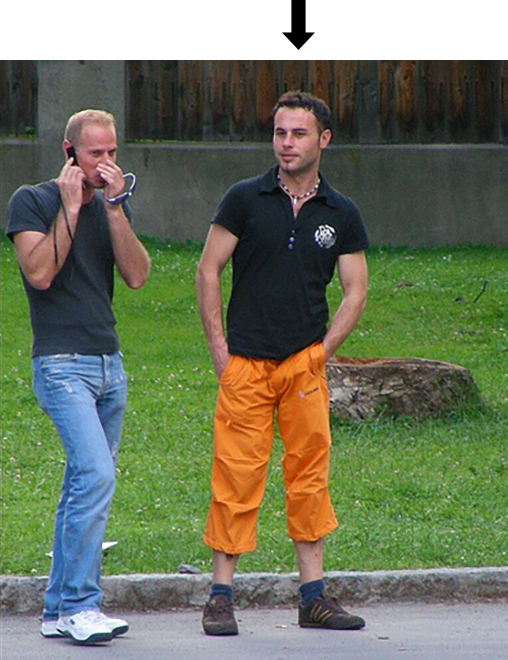

In [69]:
evaluate_image(0)

Loss:0.24752594530582428
GT:[2.142857  3.9069767 2.8139534 5.6511626 4.095238  4.904762  2.7674417]
Predicted:[3.1052728, 3.8966992, 2.5822103, 5.6196637, 4.0751963, 4.7508903, 3.6204112]


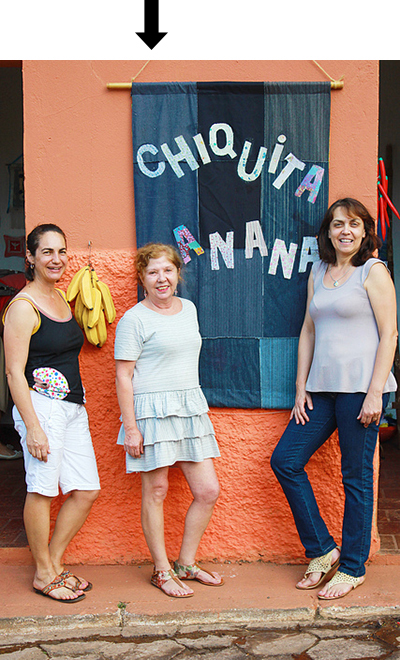

In [70]:
evaluate_image(2)

Loss:1.015322208404541
GT:[2.4761906 4.4761906 2.8095238 5.952381  4.3809524 5.214286  1.6666666]
Predicted:[2.6706405, 4.4394703, 3.55383, 3.657349, 3.736362, 4.9180303, 2.529029]


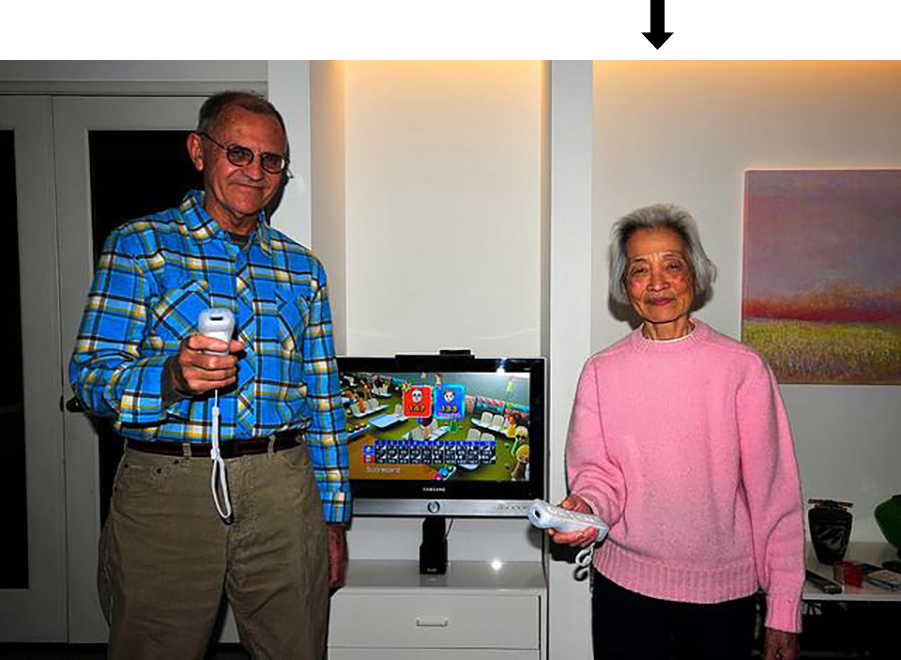

In [71]:
evaluate_image(112)

Ideal Loss: 0.01~0.1225

In [72]:
# Evaluation
test_output = []

model.eval()
with torch.no_grad():
    test_loss = 0
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        test_output += outputs
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
    
    test_loss /= len(test_loader)

test_output = [output.cpu().detach().numpy() for output in test_output]

In [73]:
predicted_df = pd.DataFrame(test_output, columns=['attractive', 'competent', 'dominant', 'feminine', 'open', 'warm', 'youthful'])
gt_df = pd.DataFrame(y_test, columns=['attractive', 'competent', 'dominant', 'feminine', 'open', 'warm', 'youthful'])
gt_df

,attractive,competent,dominant,feminine,open,warm,youthful
0,4.380952,4.023809,4.190476,2.023809,4.190476,3.511628,5.162791
1,3.690476,4.857143,3.023809,6.071429,3.428571,3.166667,4.071429
2,2.142857,3.906977,2.813953,5.651163,4.095238,4.904762,2.767442
3,3.666667,4.023809,3.714286,5.428571,3.073171,2.627907,4.755556
4,3.904762,3.952381,3.238095,6.190476,4.000000,3.547619,3.704545
...,...,...,...,...,...,...,...
108,4.619048,4.119048,3.476191,5.595238,4.452381,3.023256,5.428571
109,2.785714,4.357143,4.880952,1.214286,3.357143,3.348837,2.488889
110,2.880952,4.833333,3.238095,4.880952,4.380952,5.000000,3.177778
111,2.595238,4.666667,4.023809,1.761905,2.952381,3.023256,2.500000


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

def plot_rating(feature):
    data = pd.DataFrame({'X': gt_df.get(feature), 'Y': predicted_df.get(feature)})

    r = pearsonr(data.get('X'), data.get('Y'))

    # Create a scatter plot
    sns.scatterplot(data=data, x='X', y='Y')

    # Add title and labels
    plt.title(f'{feature.capitalize()} Correlation r={r[0]:.2f}')
    plt.xlabel('GT')
    plt.ylabel('Predicted')

    # Save and show the plot
    plt.savefig(f'../charts/{feature}.jpg')
    plt.show()


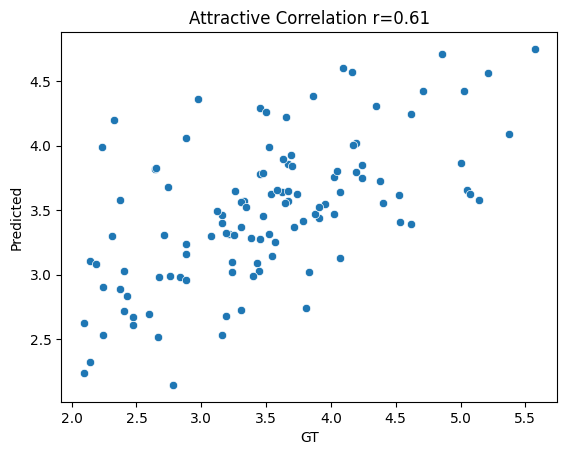

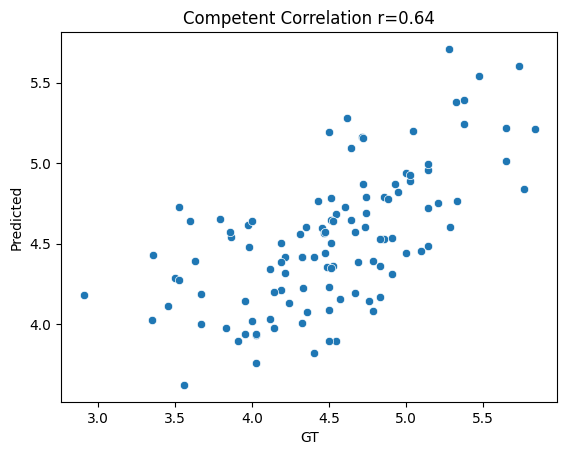

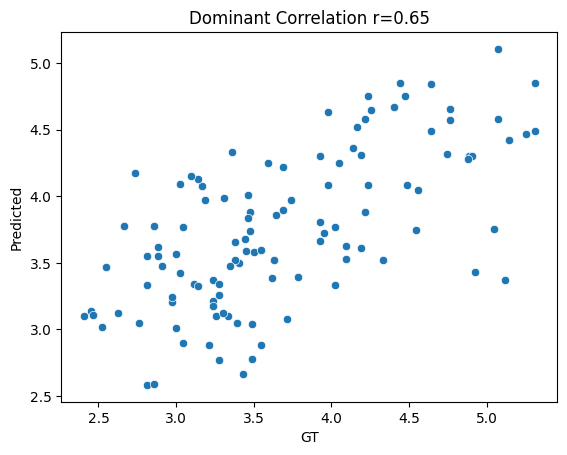

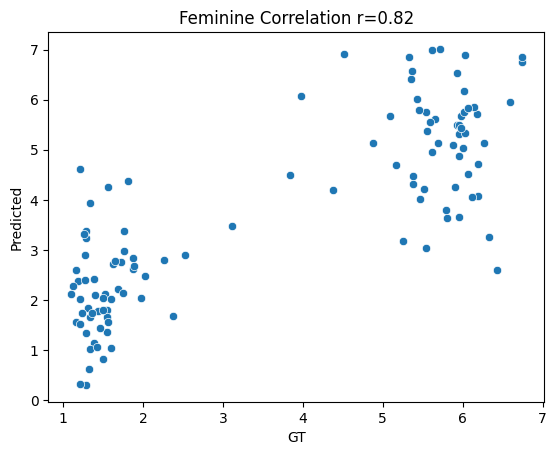

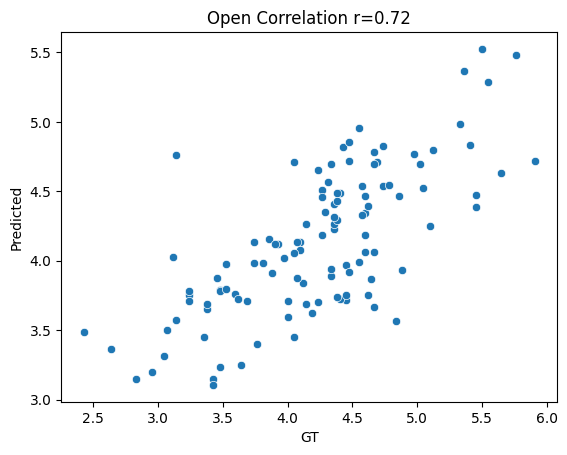

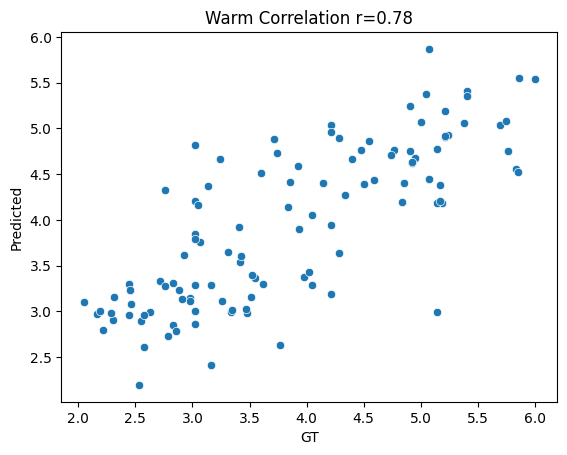

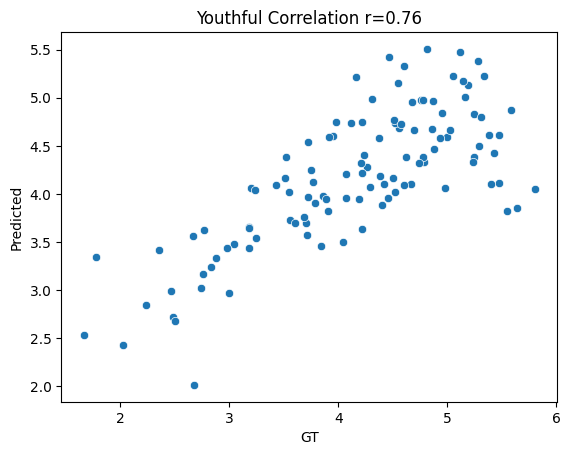

In [75]:
for i in ['attractive', 'competent', 'dominant', 'feminine', 'open', 'warm', 'youthful']:
    plot_rating(i)